In [2]:
import pandas as pd 
import networkx as nx 
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

edges = pd.read_csv('edges.csv')
edges.drop_duplicates(keep="first")
edges_new=pd.DataFrame()
edges_new['spotify_id']=edges['id_0'].append(edges['id_1'])

nodes = pd.read_csv('nodes.csv')
nodes= pd.merge(edges_new,nodes,on='spotify_id')
nodes = nodes.drop_duplicates(subset='spotify_id', keep="first")
nodes.reset_index(inplace=True)
data = nodes.to_dict('index').items()

result = pd.DataFrame(edges["id_0"].map(dict(zip(nodes.spotify_id,nodes.index))))
result["id_1"] = edges["id_1"].map(dict(zip(nodes.spotify_id,nodes.index)))
result = result.sort_values(by=['id_0'], ascending=True)
result= result.dropna()
G=nx.from_pandas_edgelist(result, source='id_0', target='id_1',edge_attr=None)
G.add_nodes_from(data)
# result.to_csv("edgelist2.csv")

node_indices = sorted([node for node in G.nodes()])
numeric_indices = [index for index in range(G.number_of_nodes())]
print((numeric_indices == node_indices))
list1=list(set(numeric_indices) - set(node_indices))
print(list1)


True
[]


In [120]:
from karateclub import Diff2Vec

model = Diff2Vec()
model.fit(G)
X = model.get_embedding()

KeyboardInterrupt: 

In [3]:
from karateclub import DeepWalk

model = DeepWalk()
model.fit(G)
embedding = model.get_embedding()

C:\Users\David\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

y=pd.read_csv("target_popularity.csv")
X_train, X_test, y_train, y_test = train_test_split(embedding, y["target"], test_size=0.2, random_state=42)
downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

AUC: 0.6803


(153321, 128)


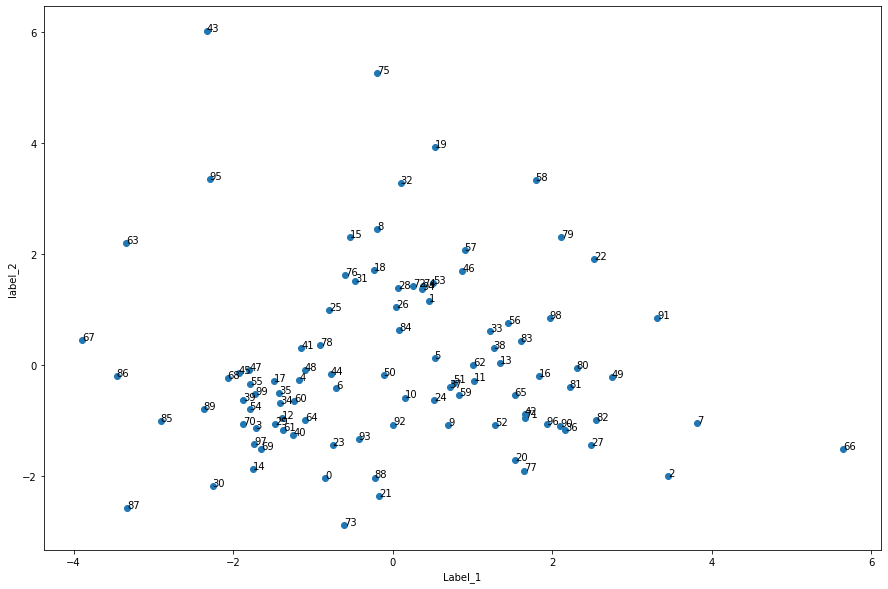

In [8]:
# print Embedding shape
print(embedding.shape)
# take first 100 nodes
nodes =list(range(100))
  
# plot nodes graph
def plot_nodes(node_no):
    X = embedding[node_no]
      
    pca = PCA(n_components=2)
    pca_out= pca.fit_transform(X)
      
      
    plt.figure(figsize=(15,10))
    plt.scatter(pca_out[:, 0], pca_out[:, 1])
    for i, node in enumerate(node_no):
        plt.annotate(node, (pca_out[i, 0], pca_out[i, 1]))
    plt.xlabel('Label_1')
    plt.ylabel('label_2')
    plt.show()
  
plot_nodes(nodes)

In [1]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

reduced_data = PCA(n_components=2).fit_transform(embedding)
kmeans = KMeans(n_clusters=16, random_state=24)
y=kmeans.fit(reduced_data)
lab = kmeans.labels_
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=lab, s=3, cmap="prism", edgecolor="grey")
# Default heatmap
# sns.heatmap(reduced_data)
# kmeans = KMeans(init="k-means++", n_clusters=16)
# kmeans.fit(reduced_data)

# # Step size of the mesh. Decrease to increase the quality of the VQ.
# h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# # Plot the decision boundary. For that, we will assign a color to each
# x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
# y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# # Obtain labels for each point in mesh. Use last trained model.
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1)
# plt.clf()
# plt.imshow(
#     Z,
#     interpolation="nearest",
#     extent=(xx.min(), xx.max(), yy.min(), yy.max()),
#     cmap=plt.cm.Paired,
#     aspect="auto",
#     origin="lower",
# )

# plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# # Plot the centroids as a white X
# centroids = kmeans.cluster_centers_
# plt.scatter(
#     centroids[:, 0],
#     centroids[:, 1],
#     marker="x",
#     s=169,
#     linewidths=3,
#     color="w",
#     zorder=10,
# )
# plt.title(
#     "K-means clustering on the spotify-artist dataset (PCA-reduced data)\n"
#     "Centroids are marked with white cross"
# )
# plt.xlim(x_min, x_max)
# plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
# plt.show()

NameError: name 'embedding' is not defined

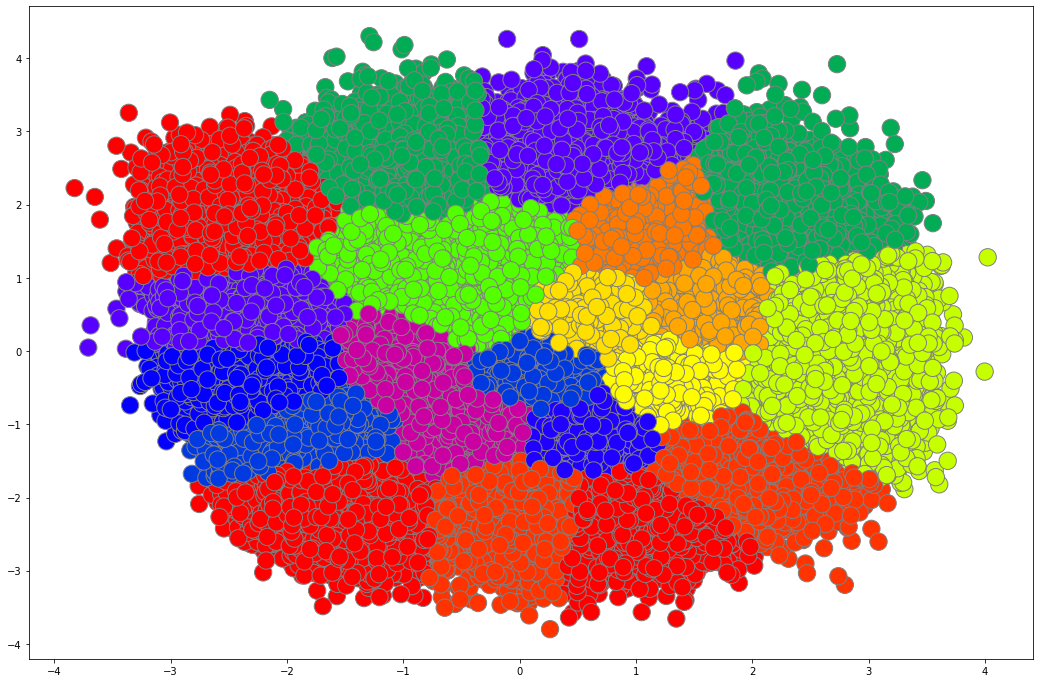

In [14]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
X_red = pca.fit_transform(embedding)
kmeans = KMeans(n_clusters=24, random_state=24)
y=kmeans.fit(X_red)
lab = kmeans.labels_

plt.figure(figsize=(18 ,12))
plt.scatter(X_red[:,0], X_red[:,1], c=lab, s=300, cmap="prism", edgecolor="grey")

# for i, txt in enumerate(target[0:1000].index):
#     plt.annotate(txt, X_red[i],
#                  horizontalalignment='center', verticalalignment='center',
#                 )

# plt.xlabel("PCA x1")
# plt.ylabel("PCA x2")
# plt.title("PCA decomposition from DeepWalk graph embedding \n + K-means clustering")
# plt.grid()
# plt.show()	

153321
0    18753
1     7284
2     5568
3     4725
4     3961
5     3470
6     3333
7     3106
8     2987
9     2770
Name: popularity, dtype: int64


<AxesSubplot:>

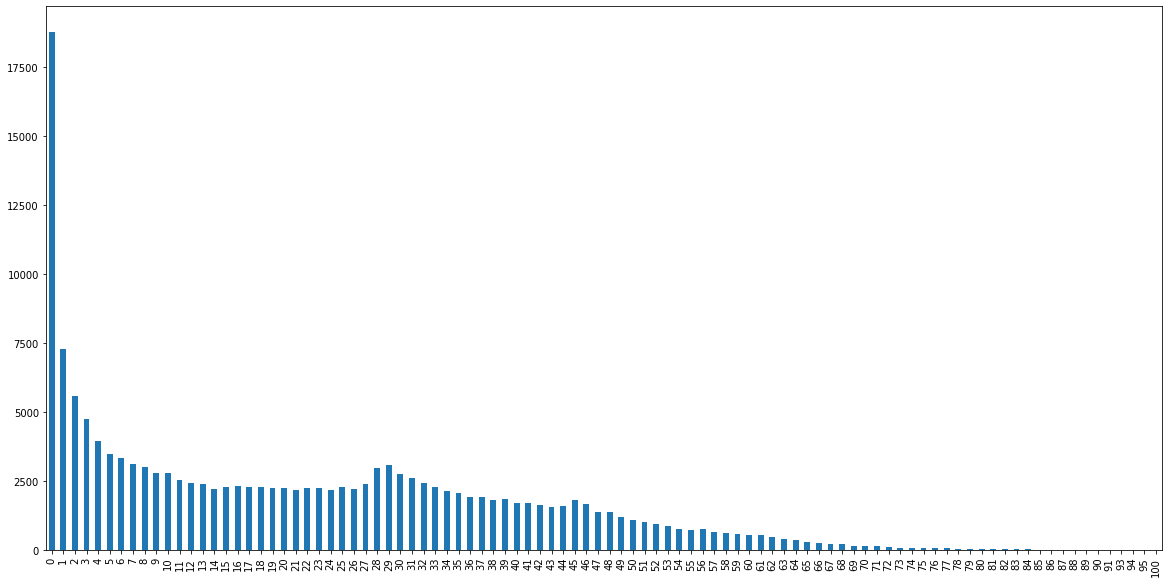

In [38]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
values=nodes['popularity'].value_counts().sort_index()
print(len(nodes))
print(values[0:10])
values.plot(ax=ax, kind='bar')

In [49]:
import ast
# nodes['genres'] = nodes['genres'].str.strip('[]').str.replace("'","").str.split('\s*,\s*')

target=pd.DataFrame()
target["id"]=0
target["target"]=0
print(nodes.columns)
count=0
for index, row in tqdm(nodes.iterrows()):
    target.at[index,'id']=count
    count+=1
    list1=nodes.at[index,'genres']
    target.at[index,'target']=int(len(list1))
print(target.head())
target.to_csv("target_genres.csv", index=False)

Index(['index', 'spotify_id', 'name', 'followers', 'popularity', 'genres',
       'chart_hits'],
      dtype='object')


153321it [02:17, 1114.40it/s]


    id  target
0  0.0     6.0
1  1.0     2.0
2  2.0     7.0
3  3.0     1.0
4  4.0     1.0


In [30]:
target=pd.DataFrame()
target["id"]=0
target["target"]=0
print(nodes.columns)
count=0
for index, row in tqdm(nodes.iterrows()):
    target.at[index,'id']=count
    count+=1
    if nodes.at[index,'chart_hits']:
        target.at[index,'target']=1
    else:
        target.at[index,'target']=0

target.to_csv("target_chartHits.csv", index=False)

In [50]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(G)
cluster_membership = model.get_memberships()

In [53]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

print(len(target),len(cluster_membership))
target=pd.read_csv("target_genres.csv")
nmi = normalized_mutual_info_score(target["id"], cluster_membership)
print('NMI: {:.4f}'.format(nmi))

153321 153321
NMI: 0.0365


In [111]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(G)
cluster_membership = model.get_memberships()
# print(cluster_membership)

In [112]:
from sklearn.metrics import normalized_mutual_info_score

target=pd.read_csv("target_popularity.csv", index_col=0)
cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]
print(target["target"],cluster_membership[0])
nmi = normalized_mutual_info_score(target["target"], cluster_membership)
print('NMI: {:.4f}'.format(nmi))

id
0.0         1.0
1.0         1.0
2.0         1.0
3.0         1.0
4.0         1.0
           ... 
153316.0    0.0
153317.0    0.0
153318.0    0.0
153319.0    1.0
153320.0    1.0
Name: target, Length: 153321, dtype: float64 884
NMI: 0.0282


In [ ]:
import networkx as nx
from karateclub import LabelPropagation

graph = nx.newman_watts_strogatz_graph(100, 20, 0.05)
cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

nmi = normalized_mutual_info_score(target["target"], cluster_membership)
print('NMI: {:.4f}'.format(nmi))
model = LabelPropagation()
model.fit(graph)
cluster_membership = model.get_memberships()

In [69]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

target=pd.read_csv("target_popularity.csv")
nmi = normalized_mutual_info_score(target["target"], cluster_membership)
print('NMI: {:.4f}'.format(nmi))

NMI: 0.0030


In [117]:
from karateclub import GraphReader

reader = GraphReader("twitch")

graph = reader.get_graph()
target = reader.get_target()

from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(graph)
cluster_membership = model.get_memberships()

from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]
print(len(target),len(cluster_membership))
print(target)
nmi = normalized_mutual_info_score(target, cluster_membership)
print('NMI: {:.4f}'.format(nmi))

7126 7126
[1 0 1 ... 0 0 1]
NMI: 0.0281


In [116]:
print(target[0:20],cluster_membership[0:20])


[1 3 0 3 2 2 2 2 3 3 3 2 3 3 3 3 0 2 3 0] [18603, 293, 46, 52, 1582, 117, 152, 682, 159, 293, 293, 682, 175, 190, 293, 2389, 254, 8400, 293, 293]


KeyError: 'Target'

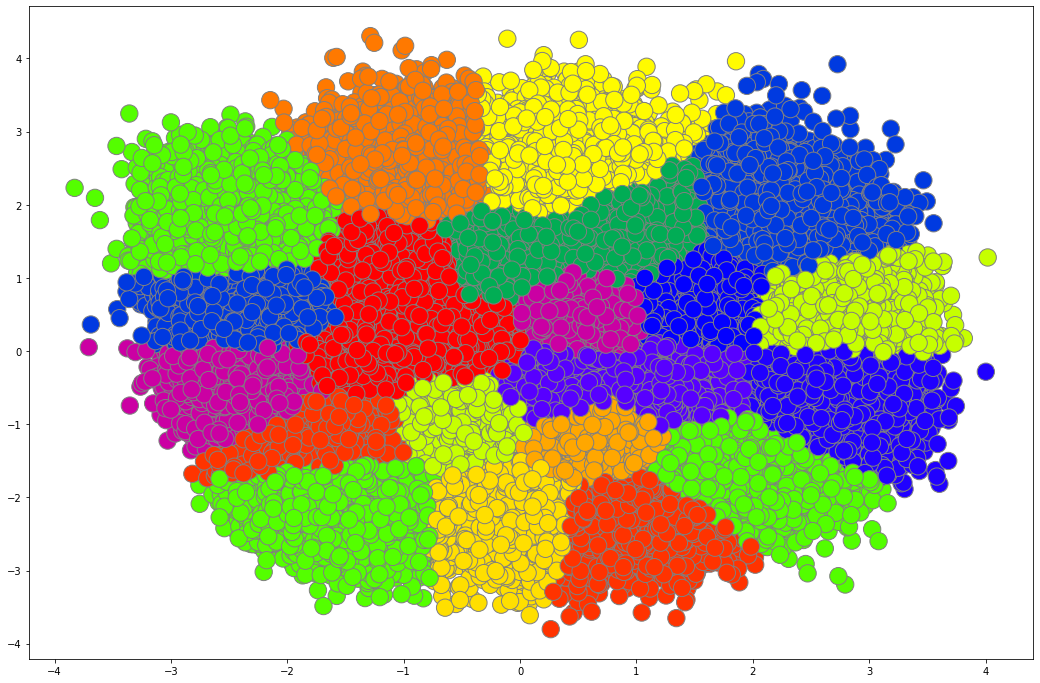

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
X_red = pca.fit_transform(embedding)
kmeans = KMeans(n_clusters=24, random_state=24)
y=kmeans.fit(X_red)
lab = kmeans.labels_

plt.figure(figsize=(18 ,12))
plt.scatter(X_red[:,0], X_red[:,1], c=lab, s=300, cmap="prism", edgecolor="grey")

for i, txt in enumerate(target["Target"].index):
    plt.annotate(txt, X_red[i],
                 horizontalalignment='center', verticalalignment='center',
                )

plt.xlabel("PCA x1")
plt.ylabel("PCA x2")
plt.title("PCA decomposition from DeepWalk graph embedding \n + K-means clustering")
plt.grid()
plt.show()	

In [4]:
target=pd.read_csv("target_f.csv",index_col=0)
print(target.head())


     target
id         
0.0     1.0
1.0     1.0
2.0     1.0
3.0     1.0
4.0     1.0


In [17]:
# fig = plt.figure(figsize=(10, 10)) 
# nx.draw(G, node_size=30) 
# plt.axis('equal') 
# plt.show() 
# fig.savefig('waka.svg') 

In [6]:

final_df = result.sort_values(by=['id_0'], ascending=True)
final_df=final_df.dropna()
final_df.reset_index(drop=True, inplace=True)
# final_df.to_csv("nodes1.csv")
final_df.id_0 = final_df.id_0.apply(np.round).astype('Int64')
final_df.id_1 = final_df.id_1.apply(np.round).astype('Int64')

# print(final_df.head(),final_df.info())
# final_df2=final_df[:1000]
# print(final_df2.head())
graph = nx.convert_matrix.from_pandas_edgelist(final_df,'id_0','id_1')
# node_indices = sorted([node for node in graph.nodes()])
# numeric_indices = [index for index in range(graph.number_of_nodes())]
# print((numeric_indices == node_indices))
# print((numeric_indices[0:20],node_indices[0:20]))
# list1=list(set(numeric_indices) - set(node_indices))
# print(sorted(list1))

In [24]:
from karateclub import LabelPropagation
import json
import networkx as nx


model = LabelPropagation()
model.fit(G)
cluster_membership = model.get_memberships()

from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

nmi = normalized_mutual_info_score(target["target"], cluster_membership)
print('NMI: {:.4f}'.format(nmi))

NMI: 0.0000


In [33]:
from karateclub import Diff2Vec

model = Diff2Vec(diffusion_number=2)
model.fit(G)
X = model.get_embedding()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target["target"], test_size=0.2, random_state=42)

from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

KeyboardInterrupt: 

In [16]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

nmi = normalized_mutual_info_score(target["target"], cluster_membership)
print('NMI: {:.4f}'.format(nmi))

NMI: 0.0268


In [6]:
from karateclub import DeepWalk

model = DeepWalk()
model.fit(G)
embedding = model.get_embedding()


In [5]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pca = PCA(n_components=2)
X_red = pca.fit_transform(embedding[0:1000])
kmeans = KMeans(n_clusters=3, random_state=0)
y=kmeans.fit(X_red)
lab = kmeans.labels_

plt.figure(figsize=(18 ,12))
plt.scatter(X_red[:,0], X_red[:,1], c=lab, s=300, cmap="prism", edgecolor="grey")

for i, txt in enumerate(target[0:1000].index):
    plt.annotate(txt, X_red[i],
                 horizontalalignment='center', verticalalignment='center',
                )

plt.xlabel("PCA x1")
plt.ylabel("PCA x2")
plt.title("PCA decomposition from DeepWalk graph embedding \n + K-means clustering")
plt.grid()
plt.show()	

NameError: name 'embedding' is not defined

In [37]:
# import the libraries
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py

# model.labels_ is nothing but the predicted clusters i.e y_clusters
# labels = model.labels_
trace = go.Scatter3d(X_red[:,0], X_red[:,1], mode='markers',marker=dict(color = lab, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

ValueError: The first argument to the plotly.graph_objs.Scatter3d
constructor must be a dict or
an instance of :class:`plotly.graph_objs.Scatter3d`

In [21]:
from karateclub import Diff2Vec

model = Diff2Vec(diffusion_number=2, diffusion_cover=20, dimensions=16)
model.fit(G)
X = model.get_embedding()
y=np.array(target["target"])
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

downstream_model = LogisticRegression(random_state=0).fit(X_train, y_train)
y_hat = downstream_model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_hat)
print('AUC: {:.4f}'.format(auc))

KeyboardInterrupt: 

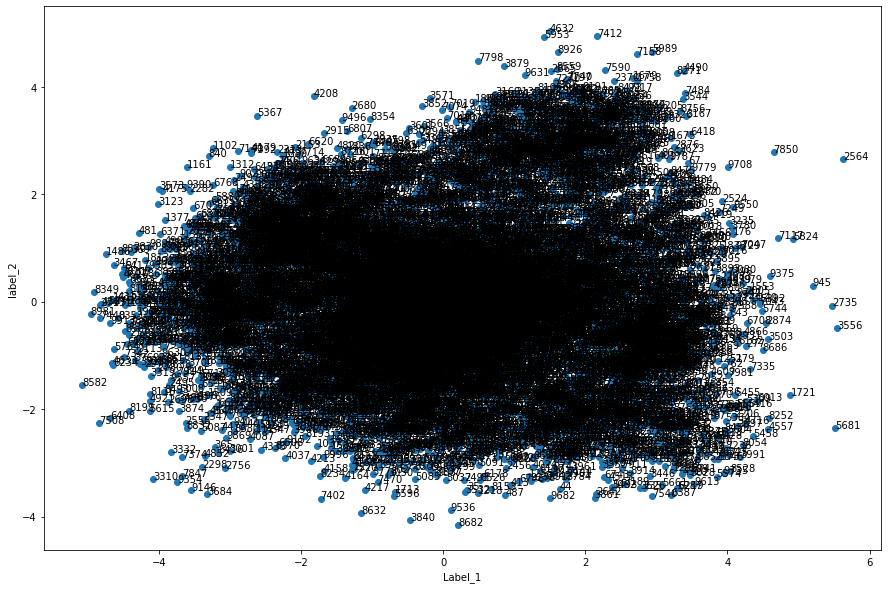

In [21]:
from sklearn.decomposition import PCA

nodes =list(range(10000))
  
# plot nodes graph
def plot_nodes(node_no):
    X = embedding[node_no]
      
    pca = PCA(n_components=2)
    pca_out= pca.fit_transform(X)
      
      
    plt.figure(figsize=(15,10))
    plt.scatter(pca_out[:, 0], pca_out[:, 1])
    for i, node in enumerate(node_no):
        plt.annotate(node, (pca_out[i, 0], pca_out[i, 1]))
    plt.xlabel('Label_1')
    plt.ylabel('label_2')
    plt.show()
plot_nodes(nodes)


In [13]:
from sklearn.metrics.cluster import normalized_mutual_info_score

cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]
target_v=np.array(target["target"])
# print(cluster_membership)
# print(target_v)
nmi = normalized_mutual_info_score(target_v, cluster_membership)
print('NMI: {:.4f}'.format(nmi))


NMI: 0.0157


In [ ]:
from karateclub import GraphReader

reader = GraphReader("facebook")

graph = reader.get_graph()
target = reader.get_target()


<class 'dict'>
